In [2]:
pip install scikit-fuzzy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 11.3 MB/s eta 0:00:00


6.838517450277207


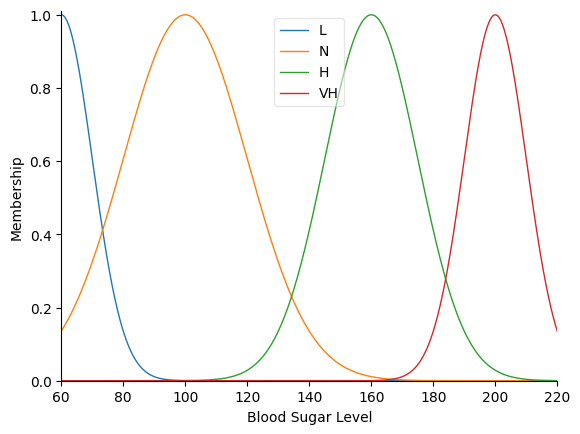

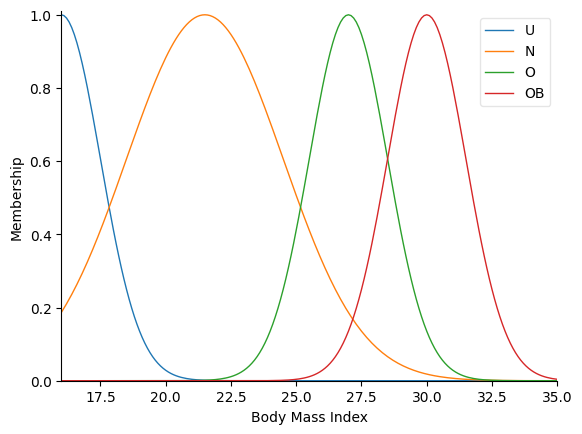

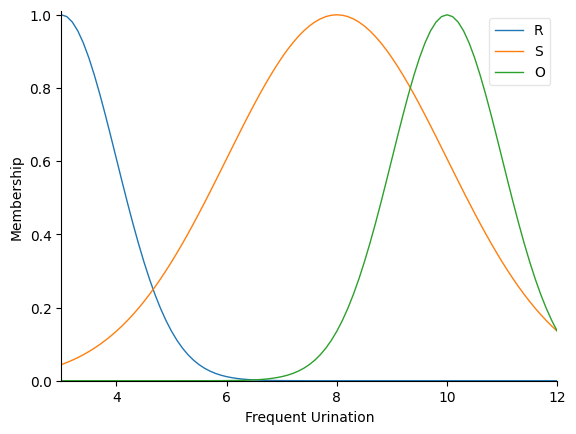

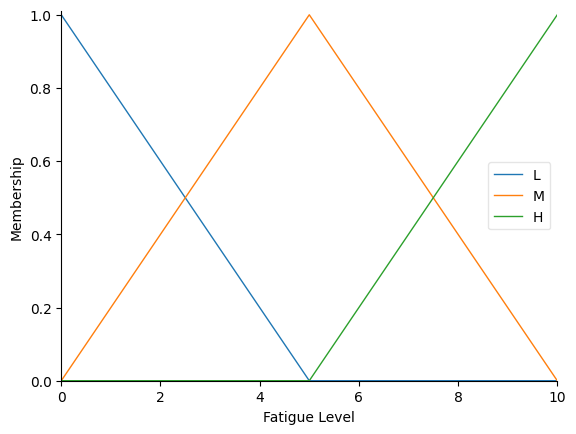

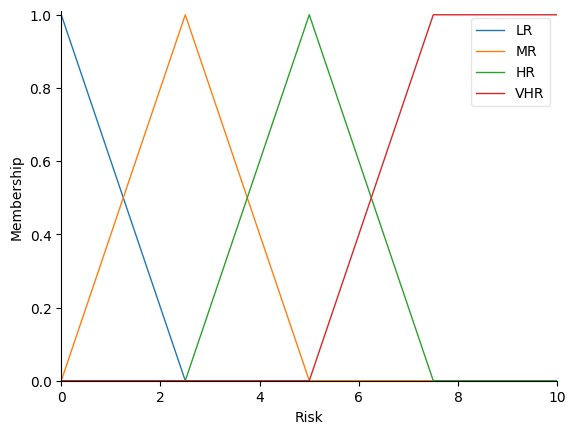

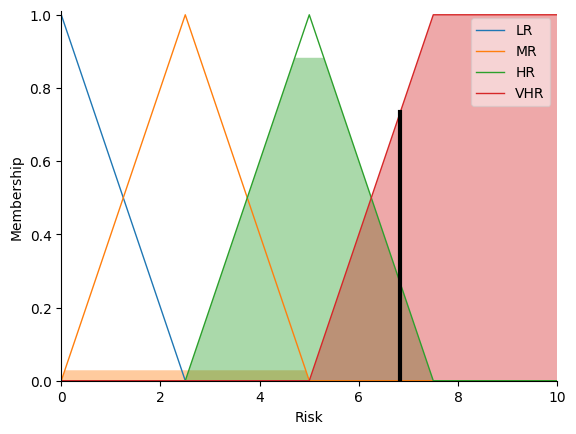

In [4]:
#2.2

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

BSL = ctrl.Antecedent(np.arange(60, 220.1, 0.1), 'Blood Sugar Level')
BMI = ctrl.Antecedent(np.arange(16, 35.1, 0.1), 'Body Mass Index')
FU = ctrl.Antecedent(np.arange(3, 12.1, 0.1), 'Frequent Urination')
FL = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'Fatigue Level')
Risk = ctrl.Consequent(np.arange(0, 10.1, 0.1), 'Risk')

BSL['L']=fuzz.gaussmf(BSL.universe, 60, 10)
BSL['N']=fuzz.gaussmf(BSL.universe, 100, 20)
BSL['H']=fuzz.gaussmf(BSL.universe, 160, 15)
BSL['VH']=fuzz.gaussmf(BSL.universe, 200, 10)

BMI['U']=fuzz.gaussmf(BMI.universe, 16, 1.5)
BMI['N']=fuzz.gaussmf(BMI.universe, 21.5, 3)
BMI['O']=fuzz.gaussmf(BMI.universe, 27, 1.5)
BMI['OB']=fuzz.gaussmf(BMI.universe, 30, 1.5)

FU['R']=fuzz.gaussmf(FU.universe, 3, 1)
FU['S']=fuzz.gaussmf(FU.universe, 8, 2)
FU['O']=fuzz.gaussmf(FU.universe, 10, 1)

FL['L']=fuzz.trimf(FL.universe, [0, 0, 5])
FL['M']=fuzz.trimf(FL.universe, [0, 5, 10])
FL['H']=fuzz.trimf(FL.universe, [5, 10, 10])

Risk['LR']=fuzz.trimf(Risk.universe, [0, 0, 2.5])
Risk['MR']=fuzz.trimf(Risk.universe, [0, 2.5, 5])
Risk['HR']=fuzz.trimf(Risk.universe, [2.5, 5, 7.5])
Risk['VHR']=fuzz.trapmf(Risk.universe, [5, 7.5, 10, 15])

BSL.view()
BMI.view()
FU.view()
FL.view()
Risk.view()

rule1 = ctrl.Rule(BSL['L']&FU['R'], Risk['LR'])
rule1=ctrl.Rule(BSL['VH']&FU['O'],Risk['VHR'])
rule2=ctrl.Rule(BSL['VH']&FU['S'],Risk['HR'])
rule3=ctrl.Rule(BSL['H']&FU['O'],Risk['HR'])
rule4=ctrl.Rule(BSL['N']&FU['R'],Risk['LR'])
rule5=ctrl.Rule(BSL['VH']&BMI['OB'],Risk['VHR'])
rule6=ctrl.Rule(BSL['VH']&BMI['O'],Risk['HR'])
rule7=ctrl.Rule(BSL['VH']&BMI['N'],Risk['HR'])
rule8=ctrl.Rule(BSL['VH']&BMI['U'],Risk['MR'])
rule9=ctrl.Rule(BSL['VH']&BMI['OB'],Risk['LR'])
rule10=ctrl.Rule(BSL['VH']&FL['H'],Risk['VHR'])
rule11=ctrl.Rule(BSL['H']&FL['H'],Risk['HR'])
rule12=ctrl.Rule(BSL['H']&FL['M'],Risk['MR'])
rule13=ctrl.Rule(BSL['N']&FL['L'],Risk['LR'])

risking_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13])
risking = ctrl.ControlSystemSimulation(risking_ctrl)
risking.input['Blood Sugar Level'] = 200
risking.input['Body Mass Index'] = 20
risking.input['Frequent Urination'] = 10
risking.input['Fatigue Level'] = 5
risking.compute()
print(risking.output['Risk'])
Risk.view(sim=risking)


Final Price: 5.652774510945632


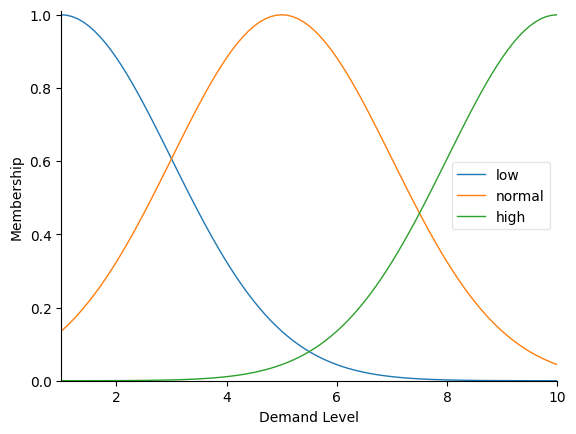

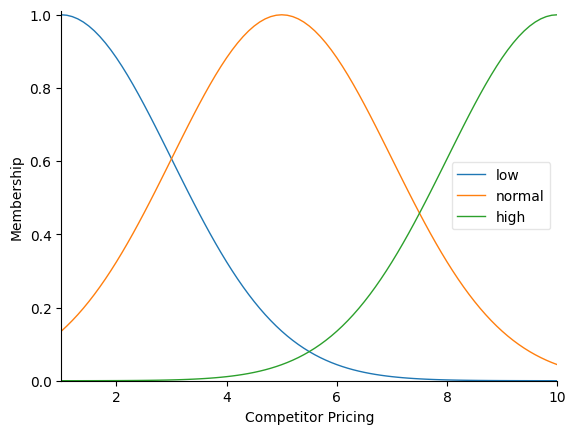

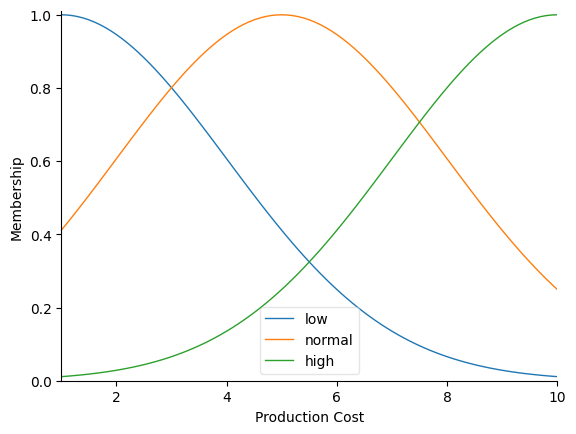

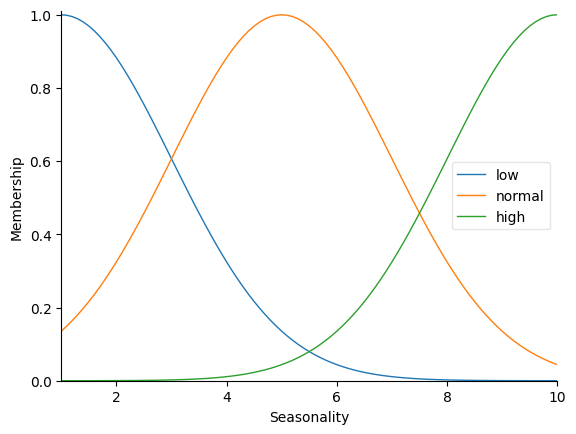

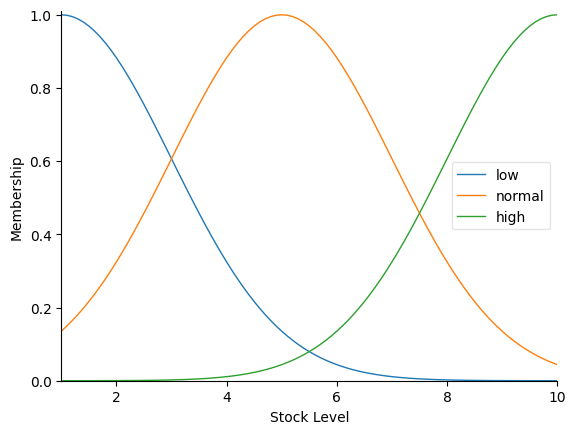

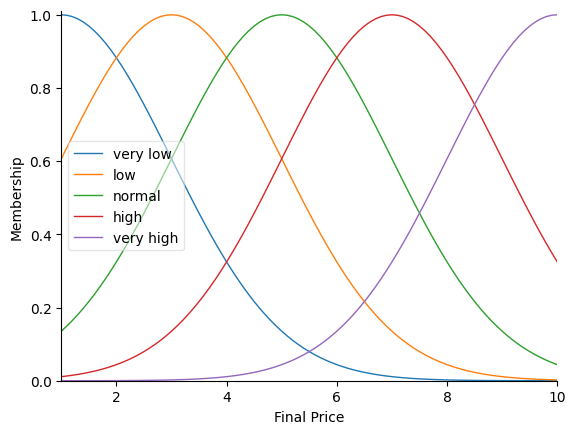

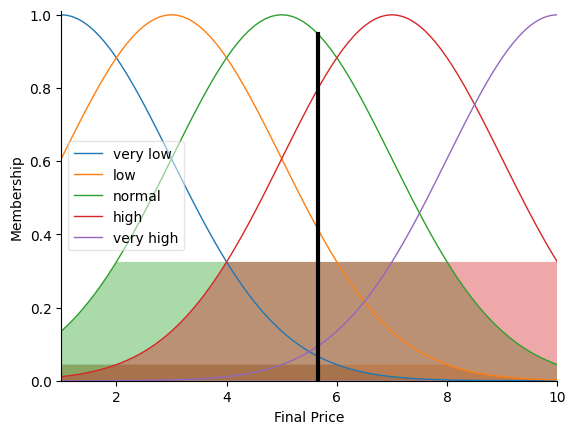

In [16]:
#2.3

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

DL = ctrl.Antecedent(np.arange(1, 10.1, 0.1), 'Demand Level')
CP = ctrl.Antecedent(np.arange(1, 10.1, 0.1), 'Competitor Pricing')
PC = ctrl.Antecedent(np.arange(1, 10.1, 0.1), 'Production Cost')
S = ctrl.Antecedent(np.arange(1, 10.1, 0.1), 'Seasonality')
ST = ctrl.Antecedent(np.arange(1, 10.1, 0.1), 'Stock Level')
FN = ctrl.Consequent(np.arange(1, 10.1, 0.1), 'Final Price')

DL['low'] = fuzz.gaussmf(DL.universe, 1, 2)
DL['normal'] = fuzz.gaussmf(DL.universe, 5, 2)
DL['high'] = fuzz.gaussmf(DL.universe, 10, 2)

CP['low'] = fuzz.gaussmf(CP.universe, 1, 2)
CP['normal'] = fuzz.gaussmf(CP.universe, 5, 2)
CP['high'] = fuzz.gaussmf(CP.universe, 10, 2)

PC['low'] = fuzz.gaussmf(PC.universe, 1, 3)
PC['normal'] = fuzz.gaussmf(PC.universe, 5, 3)
PC['high'] = fuzz.gaussmf(PC.universe, 10, 3)

S['low'] = fuzz.gaussmf(S.universe, 1, 2)
S['normal'] = fuzz.gaussmf(S.universe, 5, 2)
S['high'] = fuzz.gaussmf(S.universe, 10, 2)

ST['low'] = fuzz.gaussmf(ST.universe, 1, 2)
ST['normal'] = fuzz.gaussmf(ST.universe, 5, 2)
ST['high'] = fuzz.gaussmf(ST.universe, 10, 2)

FN['very low'] = fuzz.gaussmf(FN.universe, 1, 2)
FN['low'] = fuzz.gaussmf(FN.universe, 3, 2)
FN['normal'] = fuzz.gaussmf(FN.universe, 5, 2)
FN['high'] = fuzz.gaussmf(FN.universe, 7, 2)
FN['very high'] = fuzz.gaussmf(FN.universe, 10, 2)

DL.view()
CP.view()
PC.view()
S.view()
ST.view()
FN.view()

rule1 = ctrl.Rule(DL['high'] & CP['high'] & ST['low'], FN['very high'])
rule2 = ctrl.Rule(DL['high'] & S['high'] & ST['low'], FN['very high'])
rule3 = ctrl.Rule(DL['normal'] & PC['high'] & ST['low'], FN['very high'])
rule4 = ctrl.Rule(DL['high'] & CP['high'] & ST['normal'], FN['high'])
rule5 = ctrl.Rule(DL['normal'] & CP['high'] & ST['low'], FN['high'])
rule6 = ctrl.Rule(DL['high'] & S['normal'] & ST['normal'], FN['high'])
rule7 = ctrl.Rule(DL['normal'] & CP['normal'] & ST['normal'], FN['normal'])
rule8 = ctrl.Rule(DL['low'] & CP['high'] & ST['normal'], FN['normal'])
rule9 = ctrl.Rule(DL['normal'] & PC['normal'] & ST['normal'], FN['normal'])
rule10 = ctrl.Rule(DL['low'] & CP['low'] & ST['high'], FN['low'])
rule11 = ctrl.Rule(DL['normal'] & CP['low'] & ST['high'], FN['low'])
rule12 = ctrl.Rule(DL['low'] & S['low'] & ST['high'], FN['low'])
rule13 = ctrl.Rule(DL['low'] & CP['low'] & ST['high'], FN['very low'])
rule14 = ctrl.Rule(DL['low'] & S['low'] & ST['high'], FN['very low'])
rule15 = ctrl.Rule(DL['normal'] & CP['low'] & ST['high'], FN['very low'])

price_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15])
price = ctrl.ControlSystemSimulation(price_ctrl)
price.input['Demand Level'] = 7
price.input['Competitor Pricing'] = 6
price.input['Production Cost'] = 5
price.input['Seasonality'] = 7
price.input['Stock Level'] = 8
price.compute()
print("Final Price:", price.output['Final Price'])
FN.view(sim=price)

Water Flow: 5.401412366587371
Time: 5.401412366587371


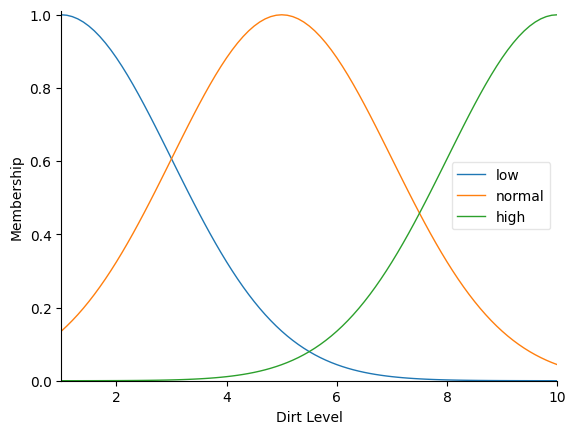

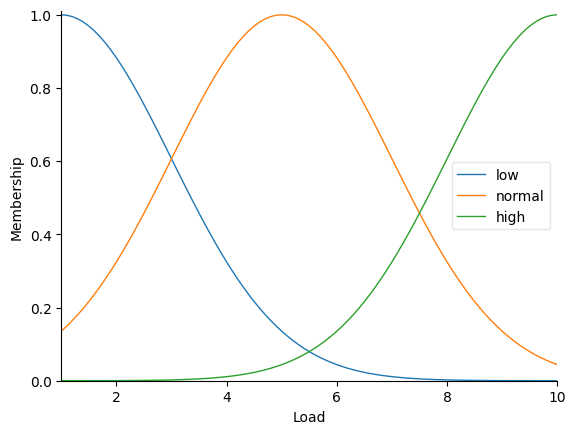

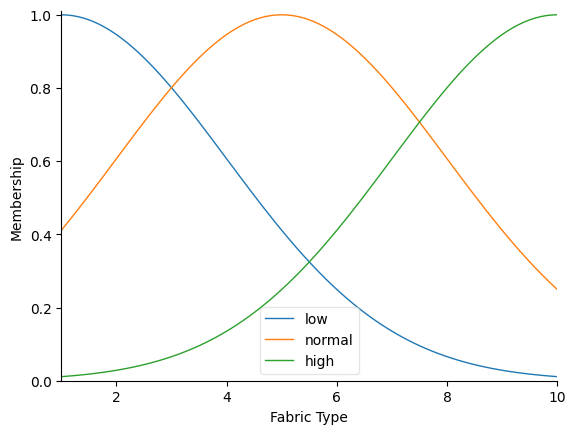

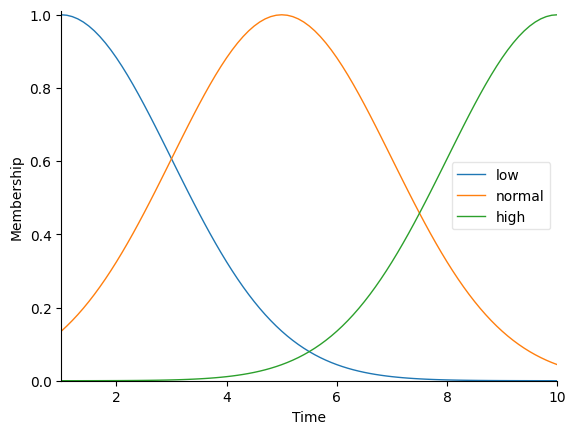

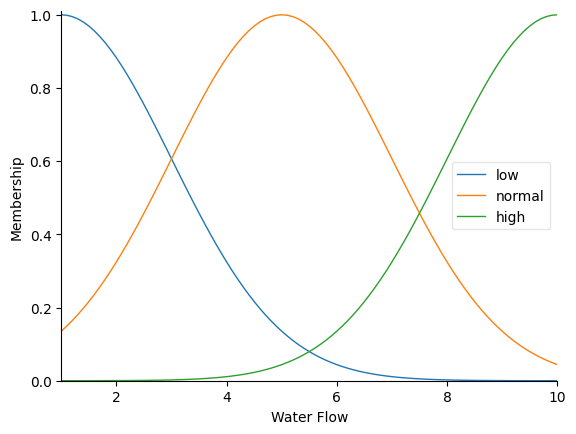

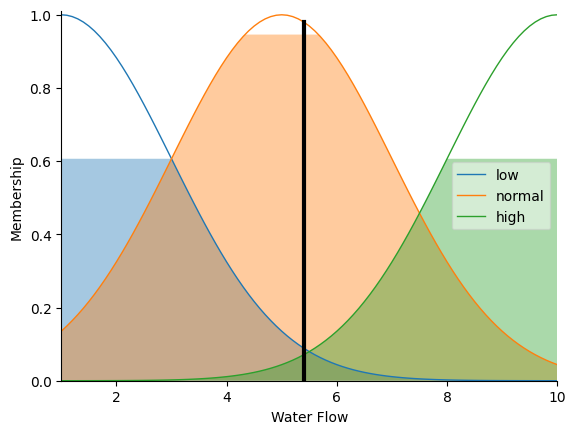

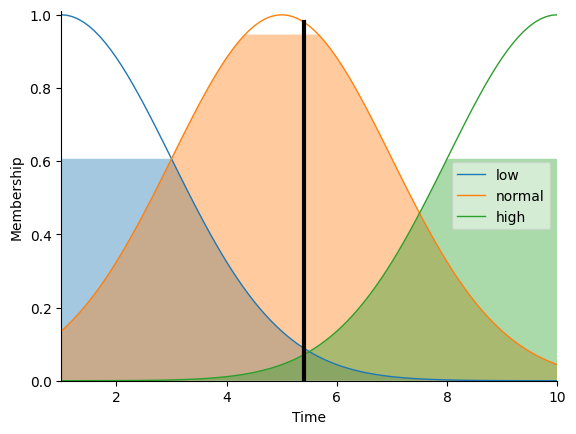

In [17]:
#2.4

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

L = ctrl.Antecedent(np.arange(1, 10.1, 0.1), 'Load')
DL = ctrl.Antecedent(np.arange(1, 10.1, 0.1), 'Dirt Level')
FT = ctrl.Antecedent(np.arange(1, 10.1, 0.1), 'Fabric Type')
T = ctrl.Consequent(np.arange(1, 10.1, 0.1), 'Time')
WT = ctrl.Consequent(np.arange(1, 10.1, 0.1), 'Water Flow')

DL['low'] = fuzz.gaussmf(DL.universe, 1, 2)
DL['normal'] = fuzz.gaussmf(DL.universe, 5, 2)
DL['high'] = fuzz.gaussmf(DL.universe, 10, 2)

L['low'] = fuzz.gaussmf(L.universe, 1, 2)
L['normal'] = fuzz.gaussmf(L.universe, 5, 2)
L['high'] = fuzz.gaussmf(L.universe, 10, 2)

FT['low'] = fuzz.gaussmf(FT.universe, 1, 3)
FT['normal'] = fuzz.gaussmf(FT.universe, 5, 3)
FT['high'] = fuzz.gaussmf(FT.universe, 10, 3)

T['low'] = fuzz.gaussmf(T.universe, 1, 2)
T['normal'] = fuzz.gaussmf(T.universe, 5, 2)
T['high'] = fuzz.gaussmf(T.universe, 10, 2)

WT['low'] = fuzz.gaussmf(WT.universe, 1, 2)
WT['normal'] = fuzz.gaussmf(WT.universe, 5, 2)
WT['high'] = fuzz.gaussmf(WT.universe, 10, 2)

DL.view()
L.view()
FT.view()
T.view()
WT.view()

rule1 = ctrl.Rule(L['low'] & DL['low'], (T['low'], WT['low']))
rule2 = ctrl.Rule(L['low'] & DL['normal'], (T['normal'], WT['normal']))
rule3 = ctrl.Rule(L['low'] & DL['high'], (T['high'], WT['normal']))
rule4 = ctrl.Rule(L['normal'] & DL['low'], (T['normal'], WT['normal']))
rule5 = ctrl.Rule(L['normal'] & DL['normal'], (T['high'], WT['normal']))
rule6 = ctrl.Rule(L['normal'] & DL['high'], (T['high'], WT['high']))
rule7 = ctrl.Rule(L['high'] & DL['low'], (T['normal'], WT['high']))
rule8 = ctrl.Rule(L['high'] & DL['high'], (T['high'], WT['high']))
rule9 = ctrl.Rule(FT['low'], (T['low'], WT['low']))
rule10 = ctrl.Rule(FT['normal'], (T['normal'], WT['normal']))
rule11 = ctrl.Rule(FT['high'], (T['high'], WT['high']))
rule12 = ctrl.Rule(L['low'] & DL['low'] & FT['low'], (T['low'], WT['low']))
rule13 = ctrl.Rule(L['normal'] & DL['normal'] & FT['normal'], (T['normal'], WT['normal']))
rule14 = ctrl.Rule(L['high'] & DL['high'] & FT['high'], (T['high'], WT['high']))

time_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14])
time = ctrl.ControlSystemSimulation(time_ctrl)
time.input['Dirt Level'] = 8
time.input['Load'] = 4
time.input['Fabric Type'] = 4

time.compute()

print("Water Flow:", time.output['Water Flow'])
print("Time:", time.output['Time'])
WT.view(sim=time)
T.view(sim=time)

Cooling_Level: 28.371821457439765
Fan_Speed: 1.761741164842314


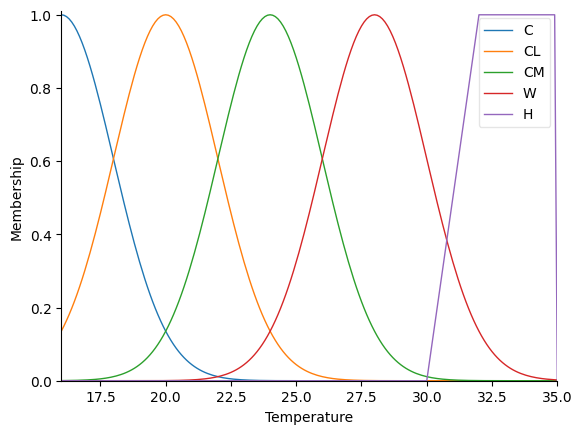

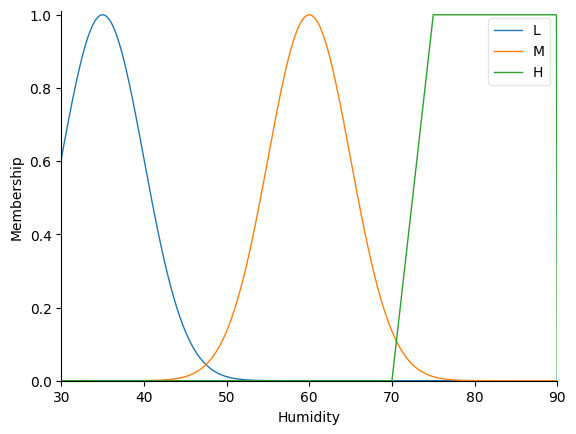

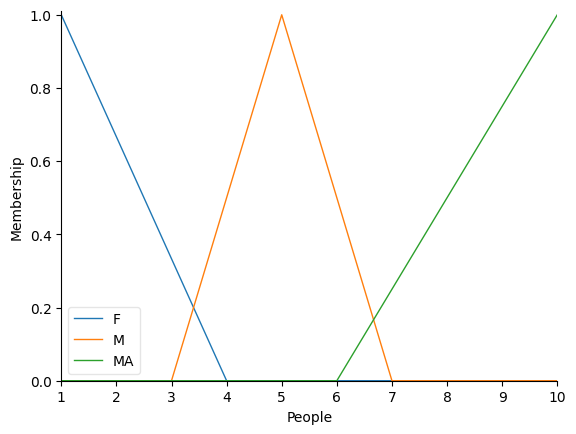

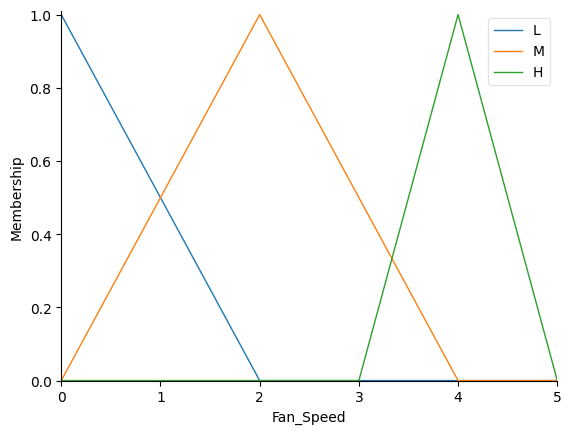

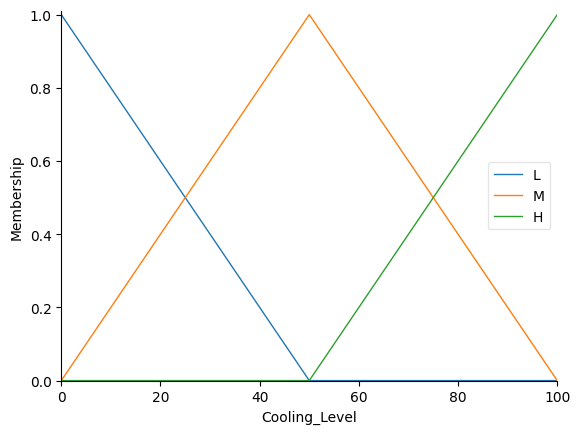

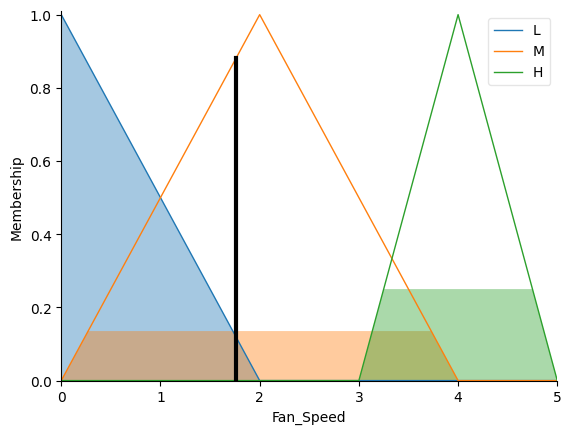

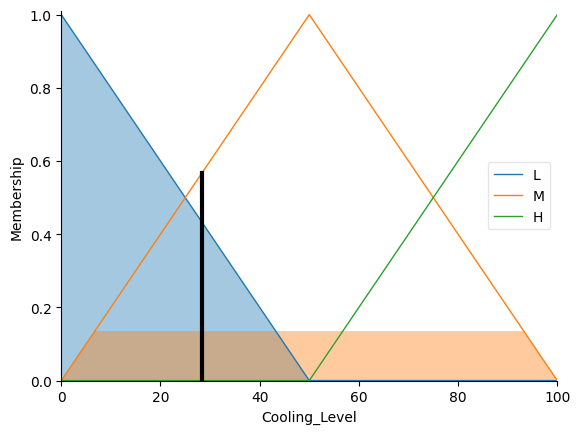

In [18]:
#2.5

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

T = ctrl.Antecedent(np.arange(16, 35.1, 0.1), 'Temperature')
H = ctrl.Antecedent(np.arange(30, 90.1, 0.1), 'Humidity')
P = ctrl.Antecedent(np.arange(1, 10.1, 1), 'People')

FS = ctrl.Consequent(np.arange(0, 5.1, 1), 'Fan_Speed')
CL = ctrl.Consequent(np.arange(0, 100.1, 0.1), 'Cooling_Level')

T['C'] = fuzz.gaussmf(T.universe, 16, 2)
T['CL'] = fuzz.gaussmf(T.universe, 20, 2)
T['CM'] = fuzz.gaussmf(T.universe, 24, 2)
T['W'] = fuzz.gaussmf(T.universe, 28, 2)
T['H'] = fuzz.trapmf(T.universe, [30, 32, 35, 35])

H['L'] = fuzz.gaussmf(H.universe, 35, 5)
H['M'] = fuzz.gaussmf(H.universe, 60, 5)
H['H'] = fuzz.trapmf(H.universe, [70, 75, 90, 90])

P['F'] = fuzz.trimf(P.universe, [1, 1, 4])
P['M'] = fuzz.trimf(P.universe, [3, 5, 7])
P['MA'] = fuzz.trimf(P.universe, [6, 10, 10])

FS['L'] = fuzz.trimf(FS.universe, [0, 0, 2])
FS['M'] = fuzz.trimf(FS.universe, [0, 2, 4])
FS['H'] = fuzz.trimf(FS.universe, [3, 4, 5])

CL['L'] = fuzz.trimf(CL.universe, [0, 0, 50])
CL['M'] = fuzz.trimf(CL.universe, [0, 50, 100])
CL['H'] = fuzz.trimf(CL.universe, [50, 100, 100])

T.view()
H.view()
P.view()
FS.view()
CL.view()

rule1 =ctrl.Rule(T['C'] , FS['L'])
rule2 =ctrl.Rule(T['CL'] , FS['L'])
rule3 =ctrl.Rule(T['CM'] , FS['M'])
rule4 =ctrl.Rule(T['W'] , FS['H'])
rule5 =ctrl.Rule(T['H'] , FS['H'])

rule6 =ctrl.Rule(T['C'] , CL['L'])
rule7 =ctrl.Rule(T['CL'] , CL['L'])
rule8 =ctrl.Rule(T['CM'] , CL['M'])
rule9 =ctrl.Rule(T['W'] , CL['H'])
rule10 =ctrl.Rule(T['H'] , CL['H'])

rule11 =ctrl.Rule(H['L'], FS['L'])
rule12 =ctrl.Rule(H['M'], FS['M'])
rule13 =ctrl.Rule(H['H'], FS['H'])

rule14 =ctrl.Rule(P['F'], FS['L'])
rule15 =ctrl.Rule(P['M'], FS['M'])
rule16 =ctrl.Rule(P['MA'], FS['H'])

rule17 = ctrl.Rule(T['H'] & H['H'] & P['MA'], [CL['H'],FS['H']])
rule18 = ctrl.Rule(T['CM'] & H['M'] & P['M'], [CL['M'],FS['M']])
rule19 = ctrl.Rule(T['CL'] & H['L'] & P['F'], [CL['L'],FS['L']])

fanspeed_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6,rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19])
fanspeed= ctrl.ControlSystemSimulation(fanspeed_ctrl)
fanspeed.input['Temperature'] = 20
fanspeed.input['Humidity'] = 50
fanspeed.input['People'] = 7
fanspeed.compute()
print("Cooling_Level:", fanspeed.output['Cooling_Level'])
print("Fan_Speed:", fanspeed.output['Fan_Speed'])
FS.view(sim=fanspeed)
CL.view(sim=fanspeed)


14.58533904364263
59.99859456616396


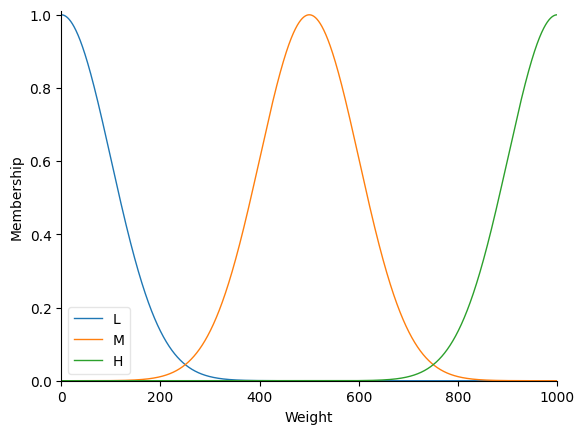

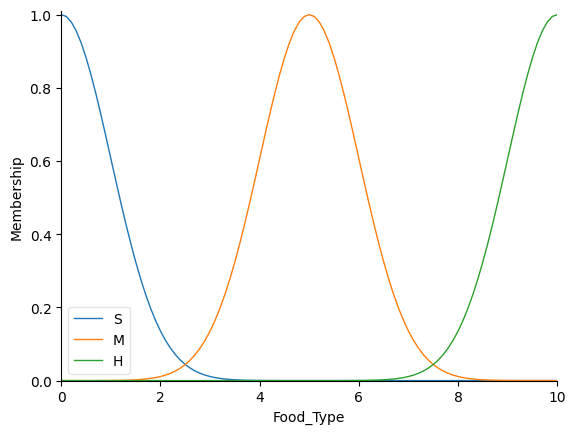

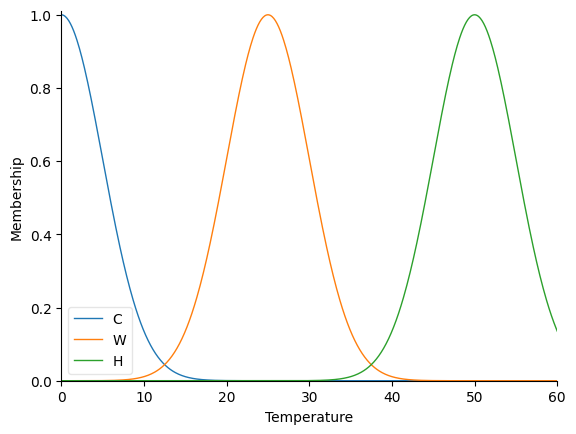

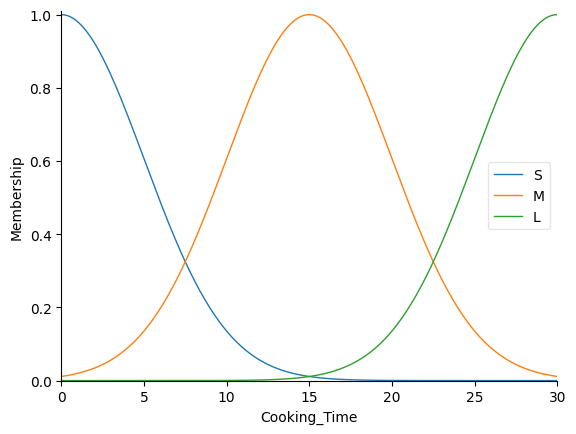

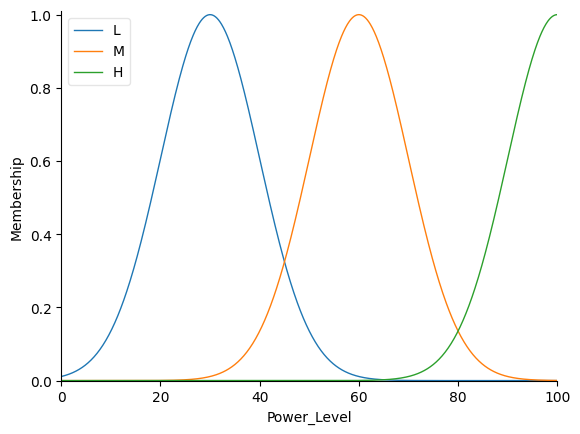

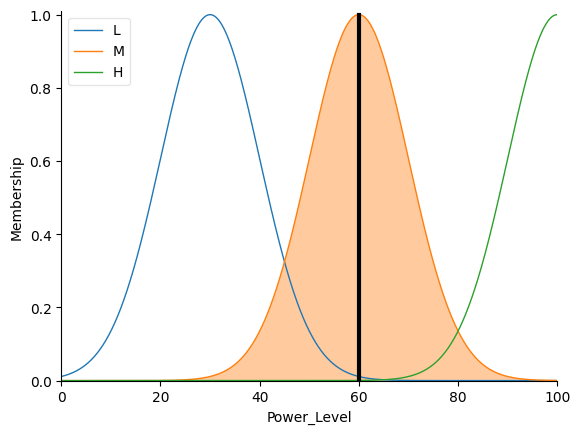

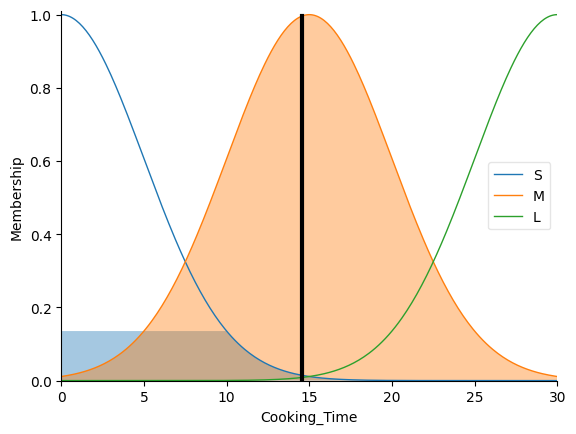

In [19]:
#2.6

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

W = ctrl.Antecedent(np.arange(0, 1000.1, 0.1), 'Weight')
FT = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'Food_Type')
T = ctrl.Antecedent(np.arange(0, 60.1, 0.1), 'Temperature')
CT = ctrl.Consequent(np.arange(0, 30.1, 0.1), 'Cooking_Time')
PL = ctrl.Consequent(np.arange(0, 100.1, 0.1), 'Power_Level')

W['L'] = fuzz.gaussmf(W.universe, 0, 100)
W['M'] = fuzz.gaussmf(W.universe, 500, 100)
W['H'] = fuzz.gaussmf(W.universe, 1000, 100)

FT['S'] = fuzz.gaussmf(FT.universe, 0, 1)
FT['M'] = fuzz.gaussmf(FT.universe, 5, 1)
FT['H'] = fuzz.gaussmf(FT.universe, 10, 1)

T['C'] = fuzz.gaussmf(T.universe, 0, 5)
T['W'] = fuzz.gaussmf(T.universe, 25, 5)
T['H'] = fuzz.gaussmf(T.universe, 50, 5)

CT['S'] = fuzz.gaussmf(CT.universe, 0, 5)
CT['M'] = fuzz.gaussmf(CT.universe, 15, 5)
CT['L'] = fuzz.gaussmf(CT.universe, 30, 5)

PL['L'] = fuzz.gaussmf(PL.universe, 30, 10)
PL['M'] = fuzz.gaussmf(PL.universe, 60, 10)
PL['H'] = fuzz.gaussmf(PL.universe, 100, 10)

W.view()
FT.view()
T.view()
CT.view()
PL.view()

rule1 = ctrl.Rule(W['L'], CT['S'])
rule2 = ctrl.Rule(W['M'], CT['M'])
rule3 = ctrl.Rule(W['H'], CT['L'])
rule4 = ctrl.Rule(FT['S'], PL['L'])
rule5 = ctrl.Rule(FT['M'], PL['M'])
rule6 = ctrl.Rule(FT['H'], PL['H'])
rule7 = ctrl.Rule(T['C'], CT['L'])
rule8 = ctrl.Rule(T['W'], CT['M'])
rule9 = ctrl.Rule(T['H'], CT['S'])
rule10 = ctrl.Rule(W['H'] & FT['H'] & T['C'], [CT['L'], PL['H']])
rule11 = ctrl.Rule(W['M'] & FT['S'] & T['W'], [CT['M'], PL['L']])
rule12 = ctrl.Rule(W['L'] & FT['M'] & T['H'], [CT['S'], PL['M']])

cooking_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12])
cooking = ctrl.ControlSystemSimulation(cooking_ctrl)

cooking.input['Weight'] = 500
cooking.input['Food_Type'] = 5
cooking.input['Temperature'] = 40
cooking.compute()
print(cooking.output['Cooking_Time'])
print(cooking.output['Power_Level'])
PL.view(sim=cooking)
CT.view(sim=cooking)

Cooking Time: 5.000000000000018
Heat Level: 66.11111111111114


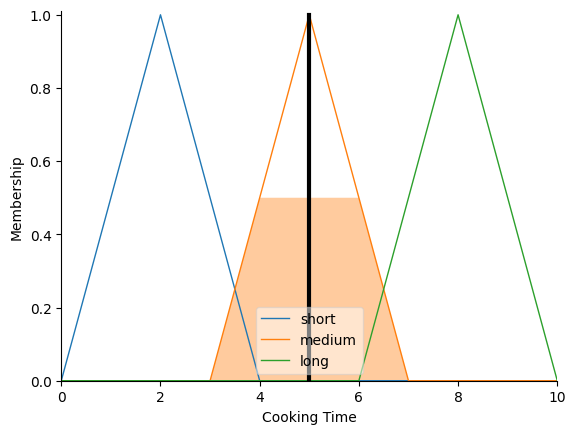

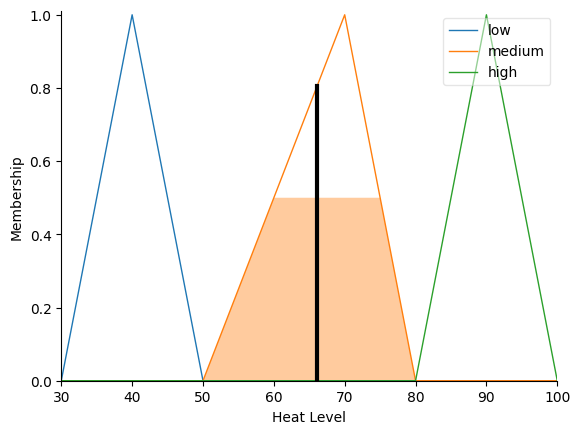

In [20]:
#2.7

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

FT=ctrl.Antecedent(np.arange(1,10.1,0.1),'Food Type')
FW=ctrl.Antecedent(np.arange(1,10.1,0.1),'Food Weight')
IT=ctrl.Antecedent(np.arange(0, 60.1, 10),'Initial Temperature')
WC=ctrl.Antecedent(np.arange(1,10.1,0.1),'Water Content')
CT = ctrl.Consequent(np.arange(0, 10.1, 0.1), 'Cooking Time')
HL = ctrl.Consequent(np.arange(30, 100.1, 10), 'Heat Level')

FT['soft'] = fuzz.trimf(FT.universe, [0, 2, 4])
FT['medium'] = fuzz.trimf(FT.universe, [3, 5, 7])
FT['hard'] = fuzz.trimf(FT.universe, [6, 8, 10])

FW['light'] = fuzz.trimf(FW.universe, [0, 2, 4])
FW['medium'] = fuzz.trimf(FW.universe, [3, 5, 7])
FW['heavy'] = fuzz.trimf(FW.universe, [6, 8, 10])

IT['cold'] = fuzz.trimf(IT.universe, [0 , 10 , 20])
IT['warm'] = fuzz.trimf(IT.universe, [20 , 30 , 40])
IT['hot'] = fuzz.trimf(IT.universe, [40, 50 , 60])

WC['low'] = fuzz.trimf(WC.universe, [0, 2, 4])
WC['medium'] = fuzz.trimf(WC.universe, [3, 5, 7])
WC['high'] = fuzz.trimf(WC.universe, [6, 8, 10])

CT['short'] = fuzz.trimf(CT.universe, [0, 2, 4])
CT['medium'] = fuzz.trimf(CT.universe, [3, 5, 7])
CT['long'] = fuzz.trimf(CT.universe, [6, 8, 10])

HL['low'] = fuzz.trimf(HL.universe, [30, 40 , 50])
HL['medium'] = fuzz.trimf(HL.universe, [50,70,80])
HL['high'] = fuzz.trimf(HL.universe, [80,90, 100])

rule1 = ctrl.Rule(FT['soft'] & FW['light'], CT['short'])
rule2 = ctrl.Rule(FT['medium'] & FW['light'], CT['medium'])
rule3 = ctrl.Rule(FT['hard'] & FW['light'], CT['long'])
rule4 = ctrl.Rule(FT['soft'] & FW['medium'], CT['medium'])
rule5 = ctrl.Rule(FT['medium'] & FW['medium'], CT['medium'])
rule6 = ctrl.Rule(FT['hard'] & FW['medium'], CT['long'])
rule7 = ctrl.Rule(FT['soft'] & FW['heavy'], CT['medium'])
rule8 = ctrl.Rule(FT['medium'] & FW['heavy'], CT['long'])
rule9 = ctrl.Rule(FT['hard'] & FW['heavy'], CT['long'])
rule10 = ctrl.Rule(IT['cold'] & WC['low'], CT['medium'])
rule11 = ctrl.Rule(IT['warm'] & WC['low'], CT['medium'])
rule12 = ctrl.Rule(IT['hot'] & WC['low'], CT['short'])
rule13 = ctrl.Rule(IT['cold'] & WC['medium'], CT['long'])
rule14 = ctrl.Rule(IT['warm'] & WC['medium'], CT['medium'])
rule15 = ctrl.Rule(IT['hot'] & WC['medium'], CT['medium'])
rule16 = ctrl.Rule(IT['cold'] & WC['high'], CT['long'])
rule17 = ctrl.Rule(IT['warm'] & WC['high'], CT['long'])
rule18 = ctrl.Rule(IT['hot'] & WC['high'], CT['medium'])
rule19 = ctrl.Rule(FT['soft'] & FW['light'], HL['low'])
rule20= ctrl.Rule(FT['medium'] & FW['light'], HL['medium'])
rule21 = ctrl.Rule(FT['hard'] & FW['light'], HL['medium'])
rule22 = ctrl.Rule(FT['soft'] & FW['medium'], HL['medium'])
rule23 = ctrl.Rule(FT['medium'] & FW['medium'], HL['medium'])
rule24 = ctrl.Rule(FT['hard'] & FW['medium'], HL['high'])
rule25 = ctrl.Rule(FT['soft'] & FW['heavy'], HL['medium'])
rule26 = ctrl.Rule(FT['medium'] & FW['heavy'], HL['high'])
rule27 = ctrl.Rule(FT['hard'] & FW['heavy'], HL['high'])

rule28 = ctrl.Rule(IT['cold'] & WC['low'], HL['high'])
rule29 = ctrl.Rule(IT['warm'] & WC['low'], HL['medium'])
rule30 = ctrl.Rule(IT['hot'] & WC['low'], HL['low'])
rule31 = ctrl.Rule(IT['cold'] & WC['medium'], HL['medium'])
rule32 = ctrl.Rule(IT['warm'] & WC['medium'], HL['medium'])
rule33 = ctrl.Rule(IT['hot'] & WC['medium'], HL['medium'])
rule34 = ctrl.Rule(IT['cold'] & WC['high'], HL['high'])
rule35 = ctrl.Rule(IT['warm'] & WC['high'], HL['high'])
rule36 = ctrl.Rule(IT['hot'] & WC['high'], HL['medium'])



cooking_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9,
rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18,
rule19, rule20, rule21, rule22, rule23, rule24, rule25, rule26, rule27,
rule28, rule29, rule30, rule31, rule32, rule33, rule34, rule35, rule36])
cooking = ctrl.ControlSystemSimulation(cooking_ctrl)
cooking.input['Food Type'] = 3
cooking.input['Food Weight'] = 7
cooking.input['Initial Temperature'] = 40
cooking.input['Water Content'] = 2
cooking.compute()
print("Cooking Time:", cooking.output['Cooking Time'])
print("Heat Level:", cooking.output['Heat Level'])
CT.view(sim=cooking)
HL.view(sim=cooking)

LieuDungThuoc: 50.00000000000018
Tinhmach: 50.00000000000054
Lieuphapoxy: 50.00000000000054


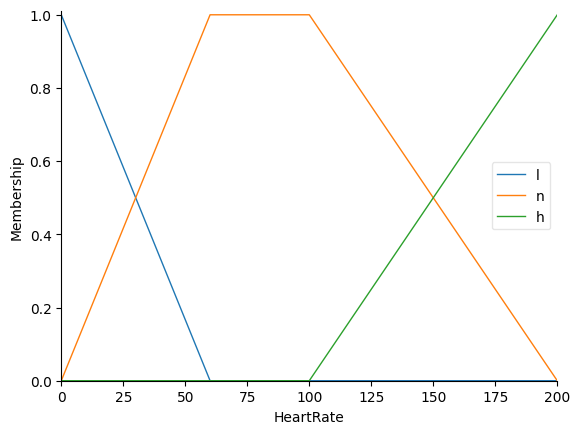

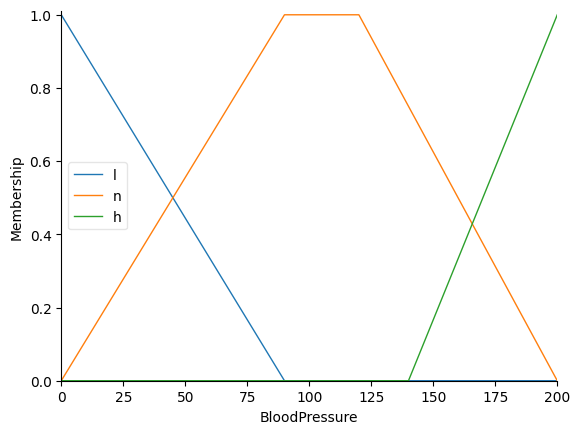

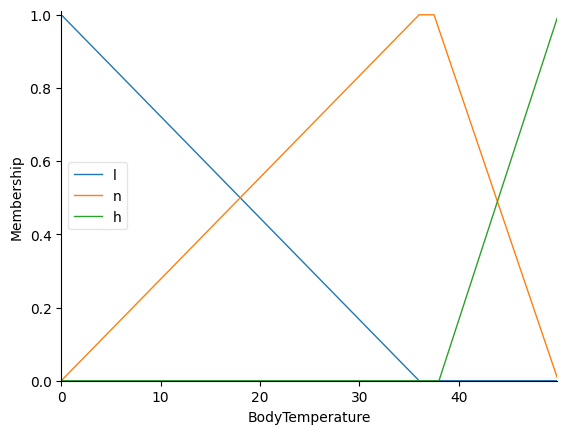

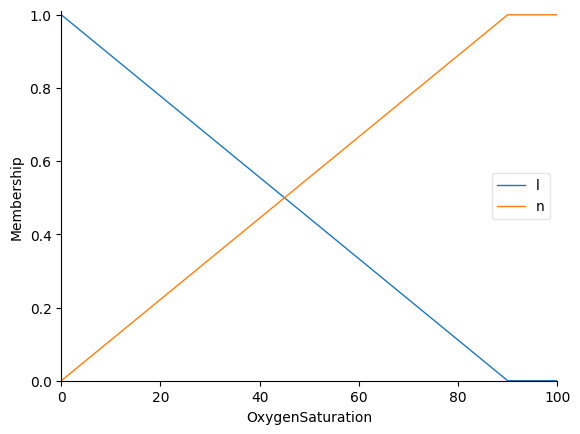

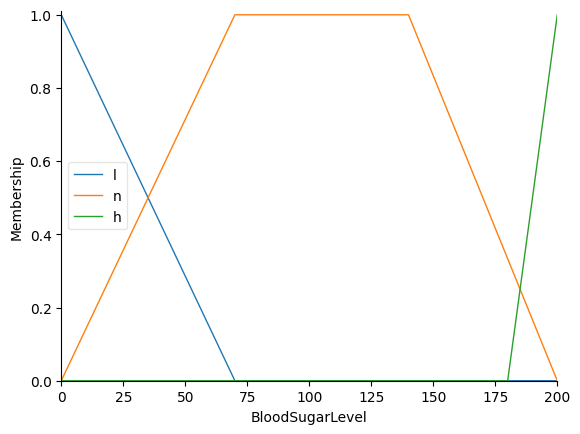

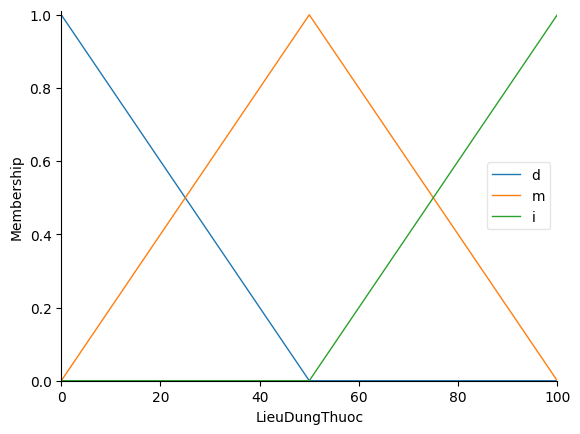

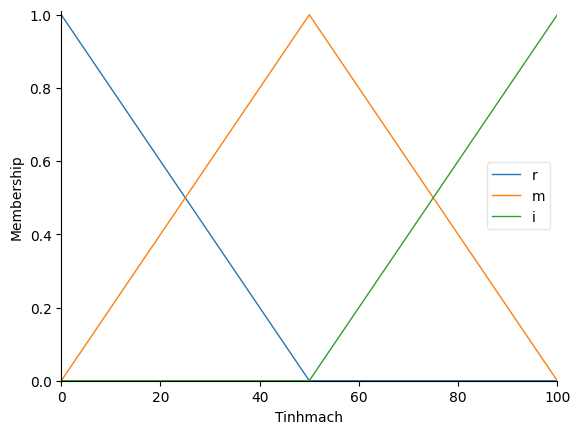

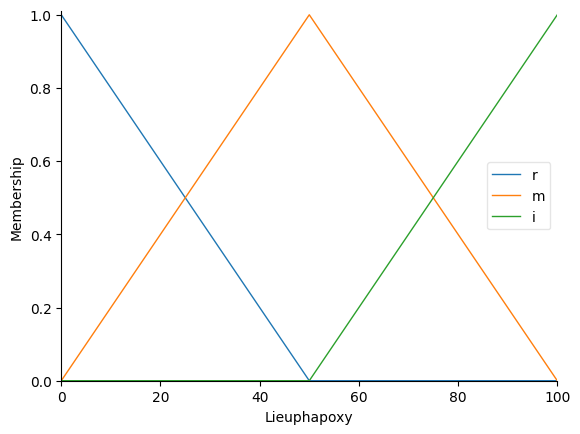

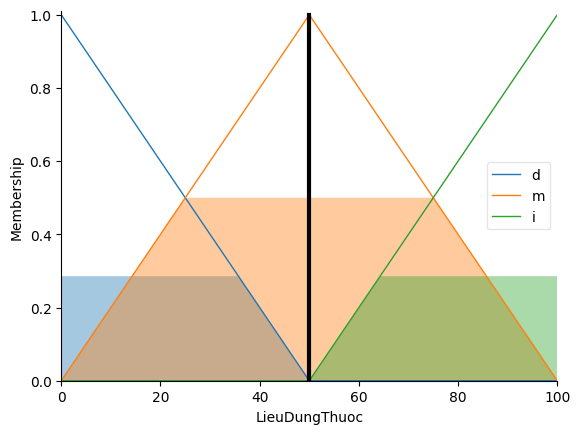

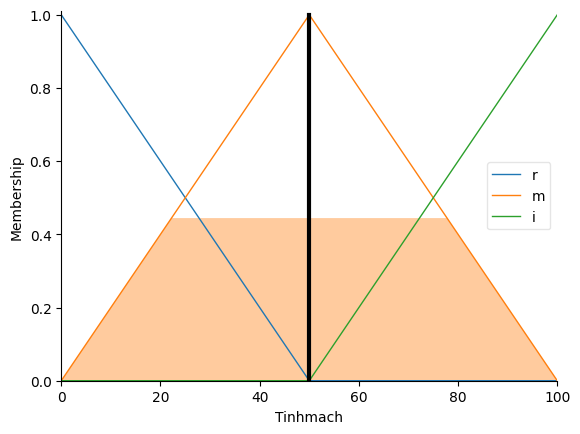

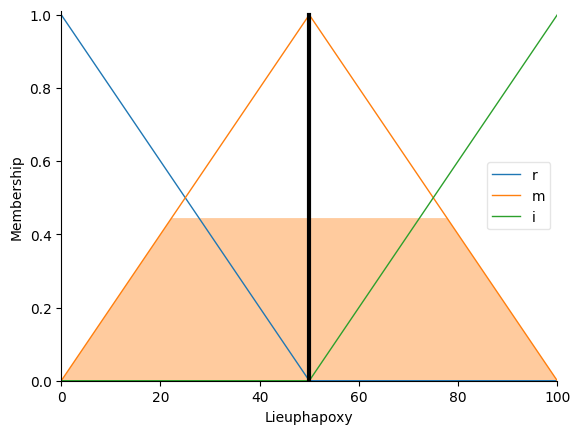

In [21]:
#2.8

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

HeartRate = ctrl.Antecedent(np.arange(0, 200.1, 0.1), 'HeartRate')
BloodPressure = ctrl.Antecedent(np.arange(0, 200.1, 0.1), 'BloodPressure')
BodyTemperature = ctrl.Antecedent(np.arange(0, 50, 0.1), 'BodyTemperature')
OxygenSaturation = ctrl.Antecedent(np.arange(0, 100.1, 0.1), 'OxygenSaturation')
BloodSugarLevel = ctrl.Antecedent(np.arange(0, 200.1, 0.1), 'BloodSugarLevel')
LieuDungThuoc = ctrl.Consequent(np.arange(0, 100.1, 0.1), 'LieuDungThuoc')
Tinhmach= ctrl.Consequent(np.arange(0, 100.1, 0.1), 'Tinhmach')
Lieuphapoxy= ctrl.Consequent(np.arange(0, 100.1, 0.1), 'Lieuphapoxy')

HeartRate['l'] = fuzz.trimf(HeartRate.universe,[0,0,60])
HeartRate['n'] = fuzz.trapmf(HeartRate.universe,[0,60,100,200])
HeartRate['h'] = fuzz.trimf(HeartRate.universe,[100,200,200])

BloodPressure['l'] = fuzz.trimf(BloodPressure.universe,[0,0,90])
BloodPressure['n'] = fuzz.trapmf(BloodPressure.universe,[0,90,120,200])
BloodPressure['h'] = fuzz.trimf(BloodPressure.universe,[140,200,200])

BodyTemperature['l'] = fuzz.trimf(BodyTemperature.universe,[0,0,36])
BodyTemperature['n'] = fuzz.trapmf(BodyTemperature.universe,[0,36,37.5,50])
BodyTemperature['h'] = fuzz.trimf(BodyTemperature.universe,[38,50,50])

OxygenSaturation['l'] = fuzz.trimf(OxygenSaturation.universe,[0,0,90])
OxygenSaturation['n'] = fuzz.trapmf(OxygenSaturation.universe,[0,90,100,100])

BloodSugarLevel['l'] = fuzz.trimf(BloodSugarLevel.universe,[0,0,70])
BloodSugarLevel['n'] = fuzz.trapmf(BloodSugarLevel.universe,[0,70,140,200])
BloodSugarLevel['h'] = fuzz.trimf(BloodSugarLevel.universe,[180,200,200])

LieuDungThuoc['d'] = fuzz.trimf(LieuDungThuoc.universe,[0,0,50])
LieuDungThuoc['m'] = fuzz.trimf(LieuDungThuoc.universe,[0,50,100])
LieuDungThuoc['i'] = fuzz.trimf(LieuDungThuoc.universe,[50,100,100])

Tinhmach['r'] = fuzz.trimf(Tinhmach.universe,[0,0,50])
Tinhmach['m'] = fuzz.trimf(Tinhmach.universe,[0,50,100])
Tinhmach['i'] = fuzz.trimf(Tinhmach.universe,[50,100,100])

Lieuphapoxy['r'] = fuzz.trimf(Lieuphapoxy.universe,[0,0,50])
Lieuphapoxy['m'] = fuzz.trimf(Lieuphapoxy.universe,[0,50,100])
Lieuphapoxy['i'] = fuzz.trimf(Lieuphapoxy.universe,[50,100,100])

HeartRate.view()
BloodPressure.view()
BodyTemperature.view()
OxygenSaturation.view()
BloodSugarLevel.view()
LieuDungThuoc.view()
Tinhmach.view()
Lieuphapoxy.view()

rule1 = ctrl.Rule(HeartRate['l'] & BloodPressure['l'], (LieuDungThuoc['i'], Tinhmach['i']))
rule2 = ctrl.Rule(HeartRate['h'] & BloodPressure['h'], (LieuDungThuoc['d']))
rule3 = ctrl.Rule(HeartRate['n'] & BloodPressure['n'], (LieuDungThuoc['m']))
rule4= ctrl.Rule(BodyTemperature['h'] & OxygenSaturation['l'], (Lieuphapoxy['i'], LieuDungThuoc['i']))
rule5= ctrl.Rule(BodyTemperature['n'] & OxygenSaturation['n'], (Lieuphapoxy['m'], LieuDungThuoc['m'], Tinhmach['m']))
rule6= ctrl.Rule(BodyTemperature['l'] & OxygenSaturation['l'], (Lieuphapoxy['i'], LieuDungThuoc['i']))
rule7= ctrl.Rule(BloodSugarLevel['l'], LieuDungThuoc['i'])
rule8= ctrl.Rule(BloodSugarLevel['l'], LieuDungThuoc['d'])
rule9= ctrl.Rule(BloodSugarLevel['h'] & HeartRate['h'] & BloodPressure['h'], (LieuDungThuoc['d']))
rule10= ctrl.Rule(OxygenSaturation['l'] & HeartRate['l'] & BloodPressure['l'], (LieuDungThuoc['i'], Tinhmach['i'], Lieuphapoxy['i']))
rule11= ctrl.Rule(BodyTemperature['h'] & OxygenSaturation['n'] & BloodPressure['h'], (LieuDungThuoc['i'], Lieuphapoxy['m']))

ketqua_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11])
ketqua = ctrl.ControlSystemSimulation(ketqua_ctrl)
ketqua.input['HeartRate'] = 150
ketqua.input['BloodPressure'] = 90
ketqua.input['BodyTemperature'] = 36
ketqua.input['OxygenSaturation'] = 40
ketqua.input['BloodSugarLevel'] = 50
ketqua.compute()
print("LieuDungThuoc:", ketqua.output['LieuDungThuoc'])
print("Tinhmach:", ketqua.output['Tinhmach'])
print("Lieuphapoxy:", ketqua.output['Lieuphapoxy'])
LieuDungThuoc.view(sim=ketqua)
Tinhmach.view(sim=ketqua)
Lieuphapoxy.view(sim=ketqua)

Review Sentiment Classification: 0.7209023063001723


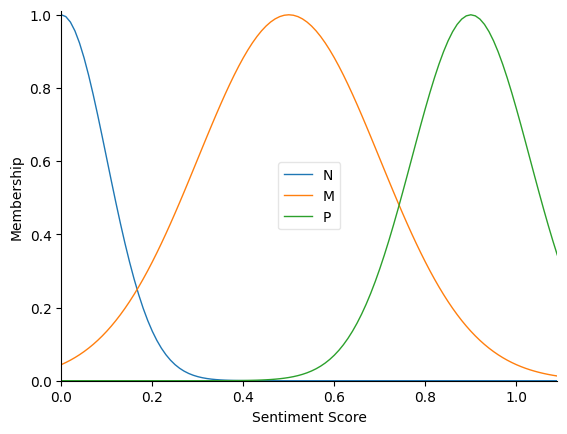

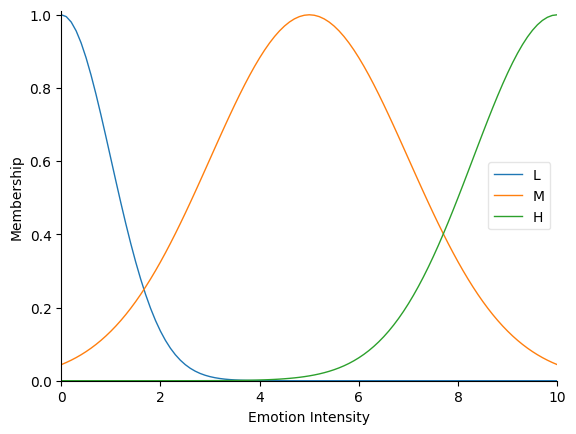

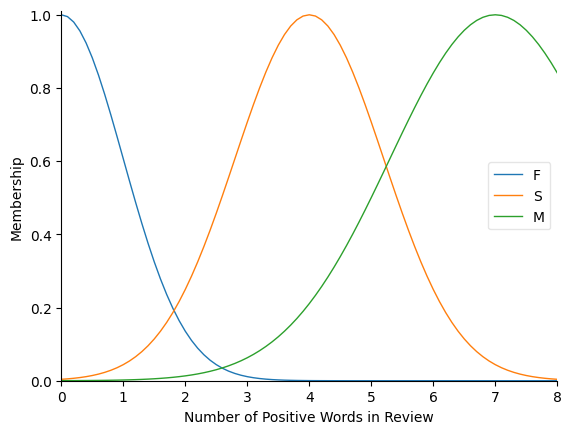

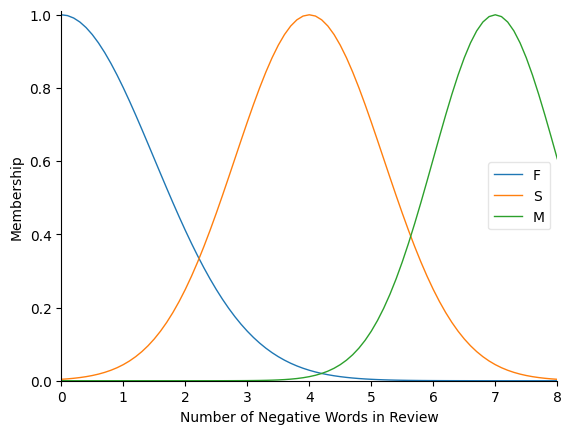

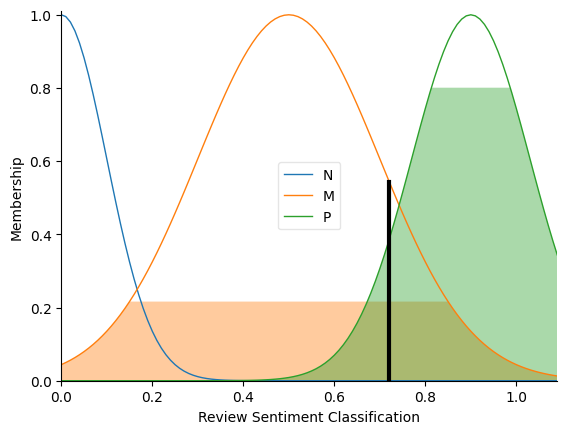

In [6]:
#2.9

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

SS = ctrl.Antecedent(np.arange(0, 1.1, 0.01), 'Sentiment Score')
EI = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'Emotion Intensity')
NPWR = ctrl.Antecedent(np.arange(0, 8.1, 0.1), 'Number of Positive Words in Review')
NNWR = ctrl.Antecedent(np.arange(0, 8.1, 0.1), 'Number of Negative Words in Review')
RSC = ctrl.Consequent(np.arange(0, 1.1, 0.01), 'Review Sentiment Classification')

SS['N']=fuzz.gaussmf(SS.universe, 0, 0.1)
SS['M']=fuzz.gaussmf(SS.universe, 0.5, 0.2)
SS['P']=fuzz.gaussmf(SS.universe, 0.9, 0.13)

EI['L']=fuzz.gaussmf(EI.universe, 0, 1)
EI['M']=fuzz.gaussmf(EI.universe, 5, 2)
EI['H']=fuzz.gaussmf(EI.universe, 10, 1.7)

NPWR['F']=fuzz.gaussmf(NPWR.universe, 0, 1)
NPWR['S']=fuzz.gaussmf(NPWR.universe, 4, 1.2)
NPWR['M']=fuzz.gaussmf(NPWR.universe, 7, 1.7)

NNWR['F']=fuzz.gaussmf(NNWR.universe, 0, 1.5)
NNWR['S']=fuzz.gaussmf(NNWR.universe, 4, 1.2)
NNWR['M']=fuzz.gaussmf(NNWR.universe, 7, 1)

RSC['N']=fuzz.gaussmf(RSC.universe, 0, 0.1)
RSC['M']=fuzz.gaussmf(RSC.universe, 0.5, 0.2)
RSC['P']=fuzz.gaussmf(RSC.universe, 0.9, 0.13)

SS.view()
EI.view()
NPWR.view()
NNWR.view()

rule1 = ctrl.Rule(SS['N']&EI['H'], RSC ['N'])
rule2 = ctrl.Rule(SS['N']&EI['L'], RSC ['M'])
rule3 = ctrl.Rule(SS['M']&EI['M'], RSC ['M'])
rule4 = ctrl.Rule(SS['P']&EI['H'], RSC ['P'])
rule5 = ctrl.Rule(NPWR['M']&NNWR['F'], RSC ['P'])
rule6 = ctrl.Rule(NPWR['F']&NNWR['M'], RSC ['N'])
rule7 = ctrl.Rule(NPWR['S']&NNWR['S'], RSC ['M'])
rule8 = ctrl.Rule(SS['N']&NNWR['M']&EI['H'], RSC ['N'])
rule9 = ctrl.Rule(SS['M']&NPWR['S']&EI['M'], RSC ['M'])
rule10 = ctrl.Rule(SS['P']&NPWR['M']&EI['H'], RSC ['P'])

rsc_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10])
rsc = ctrl.ControlSystemSimulation(rsc_ctrl)
rsc.input['Sentiment Score'] = 0.7
rsc.input['Emotion Intensity'] = 8.5
rsc.input['Number of Positive Words in Review'] = 7
rsc.input['Number of Negative Words in Review'] = 1
rsc.compute()
print("Review Sentiment Classification:", rsc.output['Review Sentiment Classification'])
RSC.view(sim=rsc)

Driver Performance Rating: 2.7408375703950454


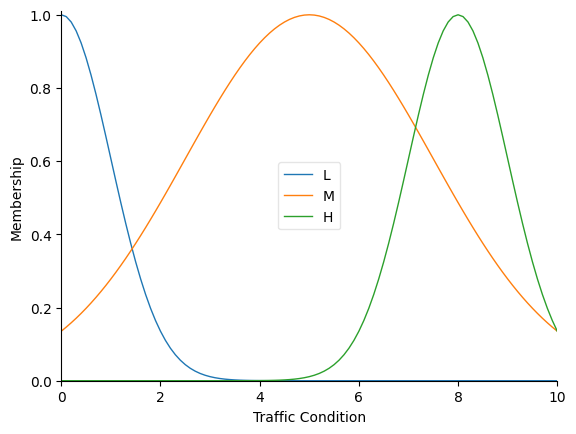

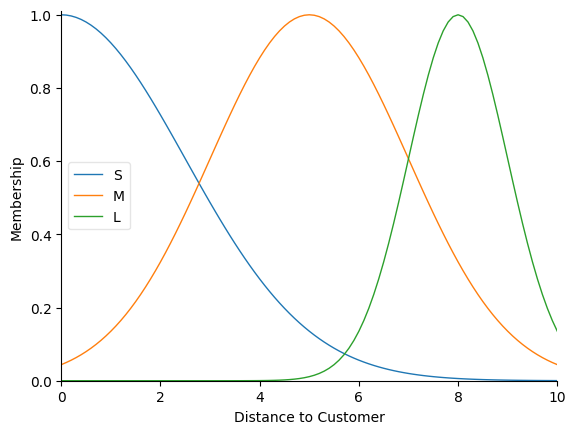

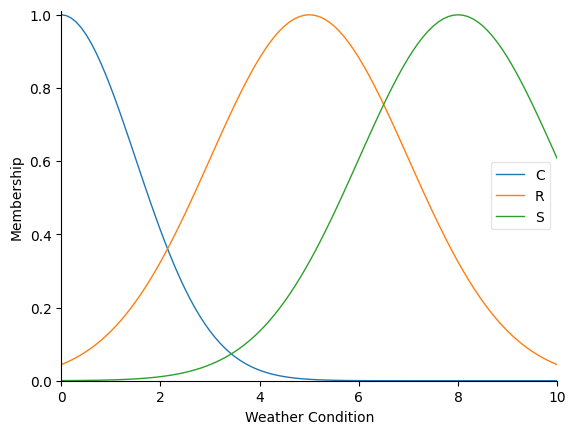

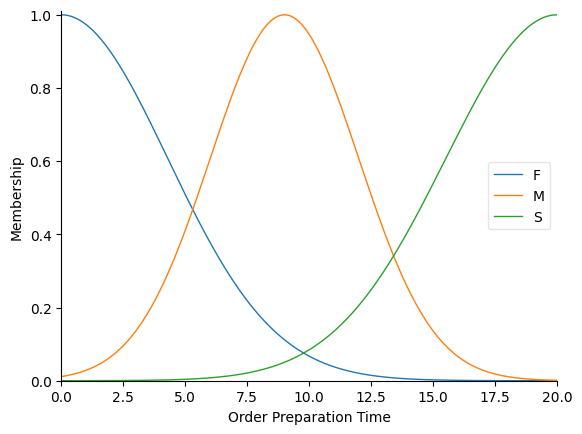

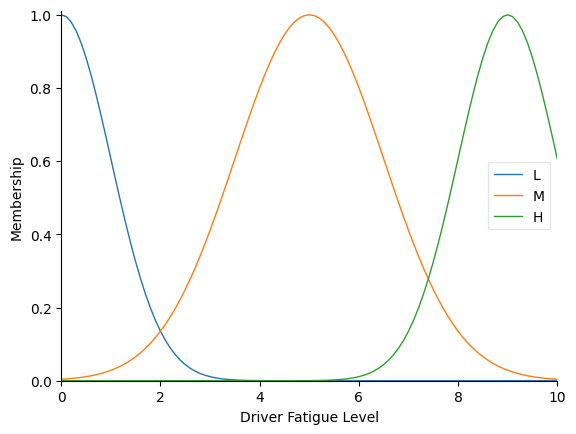

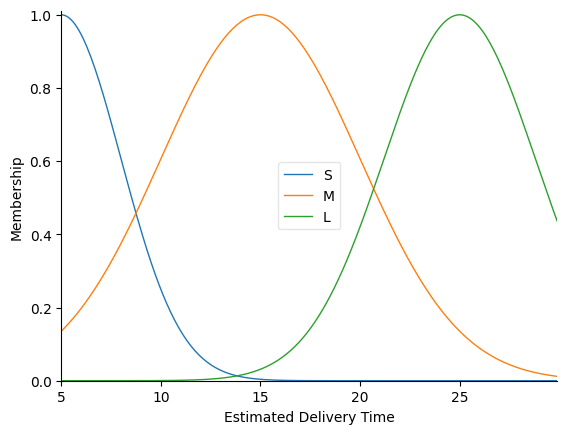

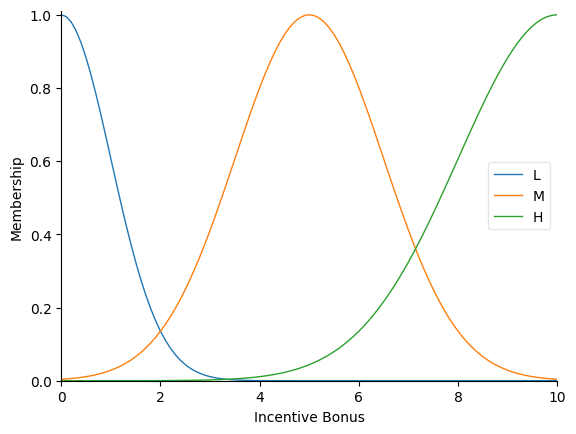

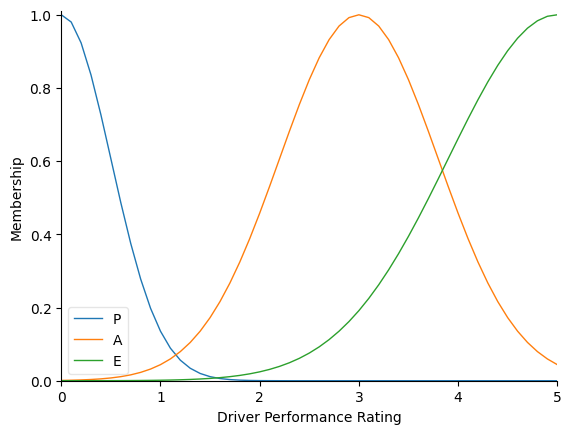

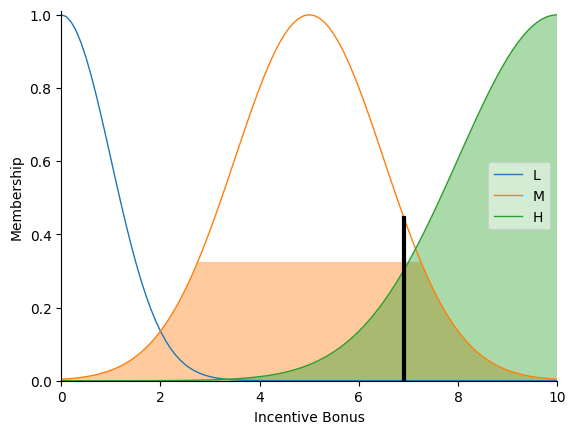

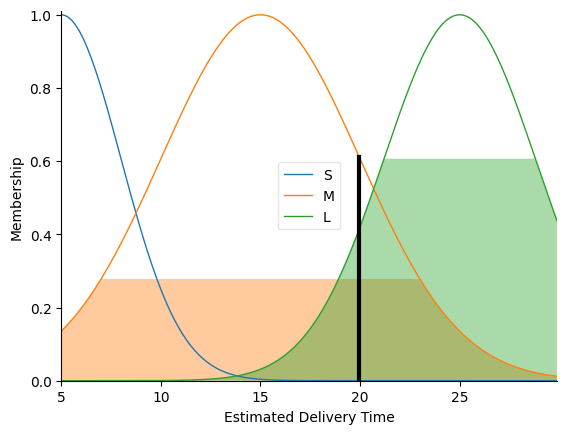

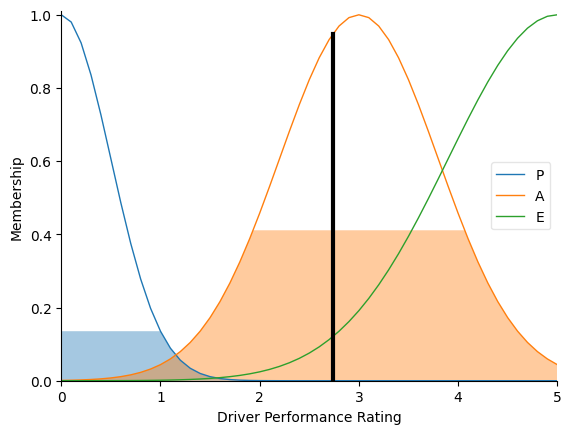

In [7]:
#2.10

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

TC = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'Traffic Condition')
DC = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'Distance to Customer')
WC = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'Weather Condition')
OPT = ctrl.Antecedent(np.arange(0, 20.1, 0.1), 'Order Preparation Time')
DFL = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'Driver Fatigue Level')
EDT = ctrl.Consequent(np.arange(5, 30, 0.1), 'Estimated Delivery Time')
IB = ctrl.Consequent(np.arange(0, 10.1, 0.1), 'Incentive Bonus')
DPR = ctrl.Consequent(np.arange(0, 5.1, 0.1), 'Driver Performance Rating')

TC['L']=fuzz.gaussmf(TC.universe, 0, 1)
TC['M']=fuzz.gaussmf(TC.universe, 5, 2.5)
TC['H']=fuzz.gaussmf(TC.universe, 8, 1)

DC['S']=fuzz.gaussmf(DC.universe, 0, 2.5)
DC['M']=fuzz.gaussmf(DC.universe, 5, 2)
DC['L']=fuzz.gaussmf(DC.universe, 8, 1)

WC['C']=fuzz.gaussmf(WC.universe, 0, 1.5)
WC['R']=fuzz.gaussmf(WC.universe, 5, 2)
WC['S']=fuzz.gaussmf(WC.universe, 8, 2)

OPT['F']=fuzz.gaussmf(OPT.universe, 0, 4.3)
OPT['M']=fuzz.gaussmf(OPT.universe, 9, 3)
OPT['S']=fuzz.gaussmf(OPT.universe, 20, 4.5)

DFL['L']=fuzz.gaussmf(DFL.universe, 0, 1)
DFL['M']=fuzz.gaussmf(DFL.universe, 5, 1.5)
DFL['H']=fuzz.gaussmf(DFL.universe, 9, 1)

EDT['S']=fuzz.gaussmf(EDT.universe, 5, 3)
EDT['M']=fuzz.gaussmf(EDT.universe, 15, 5)
EDT['L']=fuzz.gaussmf(EDT.universe, 25, 3.8)

IB['L']=fuzz.gaussmf(IB.universe, 0, 1)
IB['M']=fuzz.gaussmf(IB.universe, 5, 1.5)
IB['H']=fuzz.gaussmf(IB.universe, 10, 2)

DPR['P']=fuzz.gaussmf(DPR.universe, 0, 0.5)
DPR['A']=fuzz.gaussmf(DPR.universe, 3, 0.8)
DPR['E']=fuzz.gaussmf(DPR.universe, 5, 1.1)

TC.view()
DC.view()
WC.view()
OPT.view()
DFL.view()
EDT.view()
IB.view()
DPR.view()

rule1 = ctrl.Rule(TC['L']&DC['S'], EDT ['S'])
rule2 = ctrl.Rule(TC['M']&DC['M'], EDT ['M'])
rule3 = ctrl.Rule(TC['H']&DC['L'], EDT ['L'])
rule4 = ctrl.Rule(WC['C'], IB ['L'])
rule5 = ctrl.Rule(WC['R'], IB ['M'])
rule6 = ctrl.Rule(WC['S'], IB ['H'])
rule7 = ctrl.Rule(TC['L']&OPT['F'], EDT ['S'])
rule8 = ctrl.Rule(TC['M']&OPT['M'], EDT ['M'])
rule9 = ctrl.Rule(TC['H']&OPT['S'], EDT ['L'])
rule10 = ctrl.Rule(DFL['L'], DPR ['E'])
rule11 = ctrl.Rule(DFL['M'], DPR ['A'])
rule12 = ctrl.Rule(DFL['H'], DPR ['P'])
rule13 = ctrl.Rule(DC['L']&WC['S']&TC['H'], IB['H'], EDT['L'])
rule14 = ctrl.Rule(DC['S']&WC['C']&TC['L'], IB['L'], EDT['S'])
rule15 = ctrl.Rule(DFL['H']&TC['H'], DPR['P'], EDT['L'])

dpr_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13, rule14, rule15])
dpr = ctrl.ControlSystemSimulation(dpr_ctrl)
dpr.input['Traffic Condition'] = 9
dpr.input['Distance to Customer'] = 7
dpr.input['Weather Condition'] = 8
dpr.input['Order Preparation Time'] = 15
dpr.input['Driver Fatigue Level'] = 7
dpr.compute()
print("Driver Performance Rating:", dpr.output['Driver Performance Rating'])
IB.view(sim=dpr)
EDT.view(sim=dpr)
DPR.view(sim=dpr)
